In [22]:
import numpy as np
from scipy import fft
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib notebook

N = 50
beta = 1
L = 1
k,l = np.meshgrid(np.linspace(-1,1,N),np.linspace(-1,1,N))

def F(k,l):
    K = np.sqrt(k**2 + l**2)
    return K**2 * np.exp(-(l*k)**2)
t_vals = np.linspace(0,100,100)

def omega(k, l):
    return -beta * k / (k**2 + l**2 + L**-2)

F_vals = F(k,l)
f = np.empty((len(t_vals), N, N))

phi = np.random.uniform(-2*np.pi, 2*np.pi, size=(N,N))
#phi = 0
for i,t in enumerate(t_vals):
    F_t = F_vals * np.exp(1j * omega(k, l) * t + phi)
    f_t = np.real(np.fft.ifft2(F_t))
    f[i] = f_t


<IPython.core.display.Javascript object>


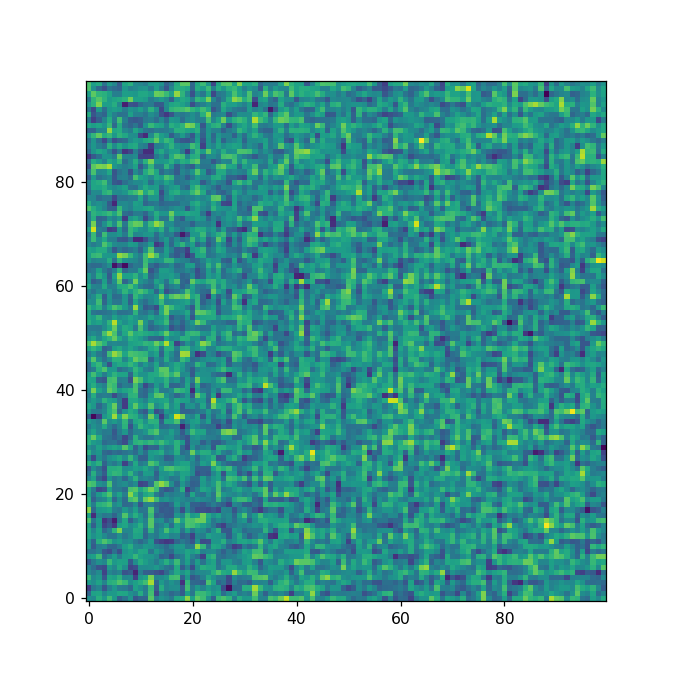

In [7]:
fig,ax = plt.subplots(figsize = (6,6))

ims = []
for i in range(len(t_vals)):
    im = ax.imshow(f[i], animated=True, origin = 'lower')
    if i == 0:
        ax.imshow(f[i])
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True)

plt.show()

<IPython.core.display.Javascript object>


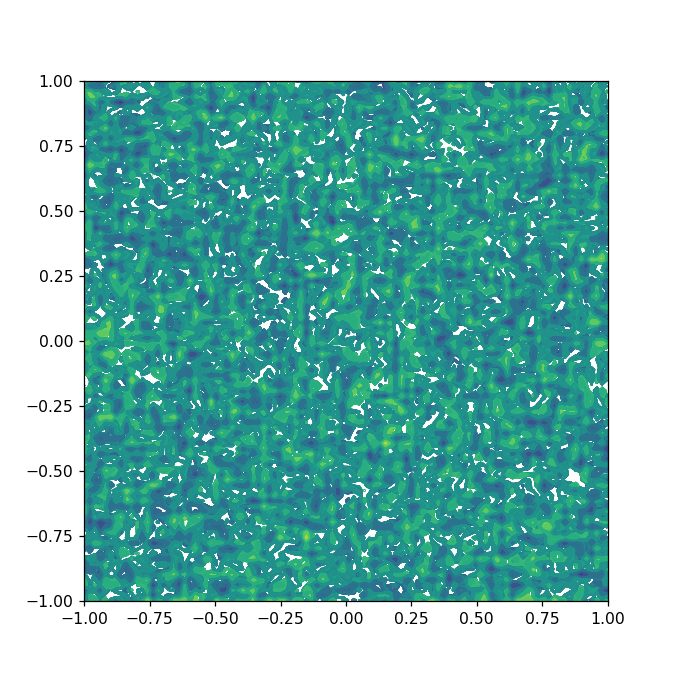

<ipython-input-8-34e78a757ccb>:5: UserWarning: The following kwargs were not used by contour: 'animated'
  im = ax.contour(k,l,f[i],animated = True)


In [8]:
fig,ax = plt.subplots(figsize = (6,6))

ims = []
for i in range(len(t_vals)):
    im = ax.contour(k,l,f[i],animated = True)
    if i == 0:
        ax.contour(k,l,f[i])
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=2, blit=True)

plt.show()

<IPython.core.display.Javascript object>


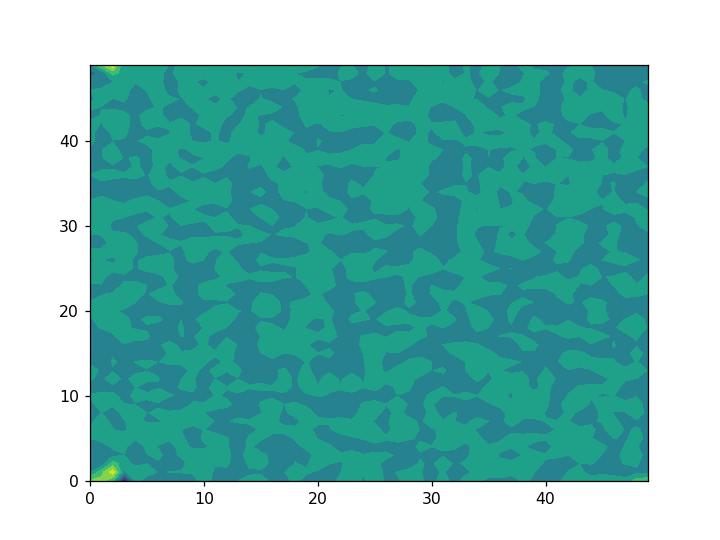

In [20]:
fig, ax = plt.subplots()
def animate(i):
    ax.clear()
    ax.contourf(f[i])
    
ani = animation.FuncAnimation(fig, animate, len(t_vals), interval=50, blit=False,repeat=True)
#ani.save('norandomphase.mp4')
plt.show()